In [1]:
# At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, 
# a support vector classifier with a small value of C that misclassifies a couple of training observations may perform better 
# on test data than one with a huge value of C that does not misclassify any training observations. You will now investigate this claim.

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from sklearn.svm import SVC

In [48]:
# Part A : Generate dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=0)

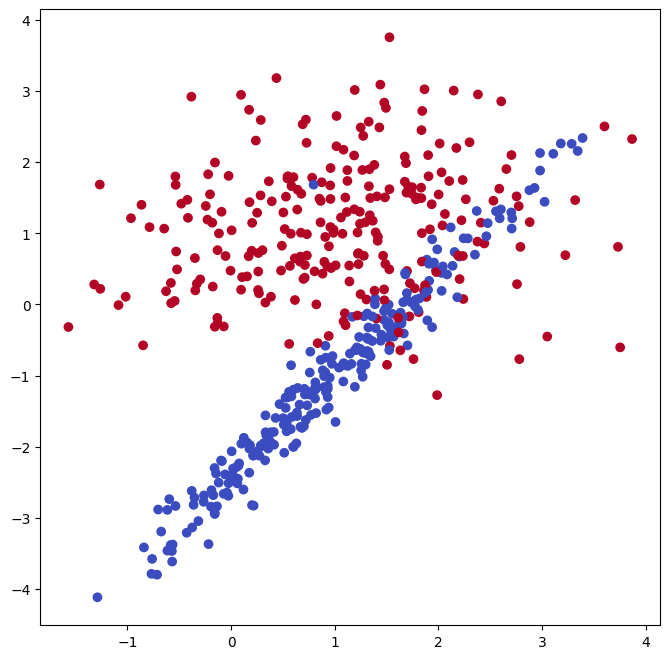

In [49]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],X[:,1],c=y, cmap = cm.coolwarm)

In [50]:
# Part B: Compute CV error rates

C_range = [0.001,0.01,0.1,1,5,10,100]
# Fit Support vector classifier
svm_linear = SVC(C=10, # Tolerance for missclassification
                 kernel='linear')
svm_linear.fit(X, y)
# Getting CV error rates
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear,
                        {'C':C_range},
                         refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(C=10, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

In [51]:
for C, split in zip(C_range,
                    ['split0_test_score','split1_test_score','split2_test_score',
                     'split3_test_score','split4_test_score']):
    print('C-Value : ' , C , ' cv_score ' , np.mean(grid.cv_results_[split]))

C-Value :  0.001  cv_score  0.8528571428571429
C-Value :  0.01  cv_score  0.8728571428571429
C-Value :  0.1  cv_score  0.8657142857142857
C-Value :  1  cv_score  0.8742857142857142
C-Value :  5  cv_score  0.8871428571428571


In [56]:
# Part B and C
X_test, y_test = make_classification(n_samples=100, n_features=2, 
                                     n_redundant=0, n_informative=2, 
                                     n_clusters_per_class=1, random_state=2)

for c in C_range:
    svm_linear = SVC(C=c, # Tolerance for missclassification
                 kernel='linear')
    svm_linear.fit(X, y)
    y_hat = svm_linear.predict(X)
    #print('Train error for C = ', c, ':', np.sum(np.abs(y_hat - y)))
    y_hat = svm_linear.predict(X_test)
    print('Test error for C = ', c, ':', np.sum(np.abs(y_hat - y_test)))

Test error for C =  0.001 : 51
Test error for C =  0.01 : 62
Test error for C =  0.1 : 65
Test error for C =  1 : 63
Test error for C =  5 : 63
Test error for C =  10 : 63
Test error for C =  100 : 63
